Self-exercise:
A reproduction of example_model.py, a sample script included with the datasets downloaded from Numer.ai. This script is not an original. This script is its conversion to Jupyter Notebook format (.ipynb).

#@! Most parts of this script are NOT part of the original script. I will clean it up later.


In [1]:
"""Example classifier on Numerai data using a logistic regression classifier. To get started, install the required 
packages: pandas, numpy, sklearn"""


'Example classifier on Numerai data using a logistic regression classifier. To get started, install the required \npackages: pandas, numpy, sklearn'

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, linear_model

#def main():
    # Set seed for reproducibility
    # np.random.seed(0)
    
print("Loading data...")
    # Load the data from the CSV files
training_data = pd.read_csv('./numerai_training_data.csv', header=0)
##detour - my own stuff
training_data.head()

Loading data...


,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,target
0,nb5059fbc40534a1,era1,train,0.49282,0.58077,0.48948,0.56762,0.56107,0.51168,0.47459,...,0.40333,0.52337,0.60795,0.35748,0.49677,0.28295,0.65342,0.57915,0.51136,1
1,nb2bb43f474f2429,era1,train,0.53427,0.72712,0.61895,0.66238,0.47163,0.66996,0.37673,...,0.46847,0.44557,0.64831,0.28245,0.68554,0.26547,0.59322,0.53156,0.61621,0
2,n1e960207daad44a,era1,train,0.54888,0.46304,0.49582,0.52395,0.57362,0.46969,0.50229,...,0.74065,0.41003,0.43230,0.78286,0.52214,0.43961,0.46139,0.61272,0.72566,1
3,n5e99b4326e6f463,era1,train,0.64488,0.56167,0.72591,0.52219,0.49311,0.51511,0.45514,...,0.67751,0.43340,0.67009,0.50086,0.51208,0.58674,0.54358,0.58602,0.51818,0
4,nf454131816e5401,era1,train,0.45235,0.56569,0.54424,0.34145,0.67652,0.44318,0.45627,...,0.40709,0.58624,0.44531,0.66276,0.41992,0.58741,0.62276,0.31212,0.22357,0


In [2]:
### detour. my own stuff. inclusive of all cells following.

import pandas as pd
import numpy as np

# read data into a DataFrame
data = pd.read_csv("./numerai_training_data.csv")
print(data.dtypes)

id            object
era           object
data_type     object
feature1     float64
feature2     float64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
feature35    float64
feature36    float64
feature37    float64
feature38    float64
feature39    float64
feature40    float64
feature41    float64
feature42    float64
feature43    float64
feature44    float64
feature45    

In [4]:
print(data.head())

                 id   era data_type  feature1  feature2  feature3  feature4  \
0  nb5059fbc40534a1  era1     train   0.49282   0.58077   0.48948   0.56762   
1  nb2bb43f474f2429  era1     train   0.53427   0.72712   0.61895   0.66238   
2  n1e960207daad44a  era1     train   0.54888   0.46304   0.49582   0.52395   
3  n5e99b4326e6f463  era1     train   0.64488   0.56167   0.72591   0.52219   
4  nf454131816e5401  era1     train   0.45235   0.56569   0.54424   0.34145   

   feature5  feature6  feature7   ...    feature42  feature43  feature44  \
0   0.56107   0.51168   0.47459   ...      0.40333    0.52337    0.60795   
1   0.47163   0.66996   0.37673   ...      0.46847    0.44557    0.64831   
2   0.57362   0.46969   0.50229   ...      0.74065    0.41003    0.43230   
3   0.49311   0.51511   0.45514   ...      0.67751    0.43340    0.67009   
4   0.67652   0.44318   0.45627   ...      0.40709    0.58624    0.44531   

   feature45  feature46  feature47  feature48  feature49  feature50 

In [5]:
print(data.shape)
print(data.head())

(535713, 54)
                 id   era data_type  feature1  feature2  feature3  feature4  \
0  nb5059fbc40534a1  era1     train   0.49282   0.58077   0.48948   0.56762   
1  nb2bb43f474f2429  era1     train   0.53427   0.72712   0.61895   0.66238   
2  n1e960207daad44a  era1     train   0.54888   0.46304   0.49582   0.52395   
3  n5e99b4326e6f463  era1     train   0.64488   0.56167   0.72591   0.52219   
4  nf454131816e5401  era1     train   0.45235   0.56569   0.54424   0.34145   

   feature5  feature6  feature7   ...    feature42  feature43  feature44  \
0   0.56107   0.51168   0.47459   ...      0.40333    0.52337    0.60795   
1   0.47163   0.66996   0.37673   ...      0.46847    0.44557    0.64831   
2   0.57362   0.46969   0.50229   ...      0.74065    0.41003    0.43230   
3   0.49311   0.51511   0.45514   ...      0.67751    0.43340    0.67009   
4   0.67652   0.44318   0.45627   ...      0.40709    0.58624    0.44531   

   feature45  feature46  feature47  feature48  feature4

In [6]:
## looking at other dataset
import pandas as pd
import numpy as np

# read data into a DataFrame
data1 = pd.read_csv("./numerai_tournament_data.csv")
data1.dtypes

id            object
era           object
data_type     object
feature1     float64
feature2     float64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
feature35    float64
feature36    float64
feature37    float64
feature38    float64
feature39    float64
feature40    float64
feature41    float64
feature42    float64
feature43    float64
feature44    float64
feature45    

In [7]:
data1.head()

,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,target
0,n614950e52f86476,era86,validation,0.73321,0.40769,0.52738,0.62752,0.53157,0.39902,0.60185,...,0.73091,0.46047,0.70016,0.46789,0.37077,0.60445,0.30939,0.65382,0.60536,0.0
1,n8c131af804784b6,era86,validation,0.41095,0.49730,0.57336,0.34116,0.60004,0.65085,0.41450,...,0.61655,0.54469,0.54147,0.47559,0.35006,0.58956,0.46743,0.39537,0.35831,1.0
2,n68cdeacc1d654de,era86,validation,0.53106,0.52798,0.40962,0.74406,0.42711,0.65237,0.49803,...,0.65628,0.45790,0.75984,0.54364,0.53942,0.50660,0.53929,0.66115,0.81356,0.0
3,n59b64bb3be044f0,era86,validation,0.37164,0.34754,0.57658,0.39391,0.53413,0.40982,0.49490,...,0.48189,0.49643,0.38714,0.70947,0.35190,0.75937,0.46353,0.40733,0.47283,0.0
4,nb859519b853849e,era86,validation,0.57009,0.47230,0.55039,0.59870,0.40695,0.41777,0.54070,...,0.59799,0.43636,0.63322,0.76684,0.40639,0.53525,0.43527,0.56586,0.61025,1.0


In [8]:
data1.shape

(348831, 54)

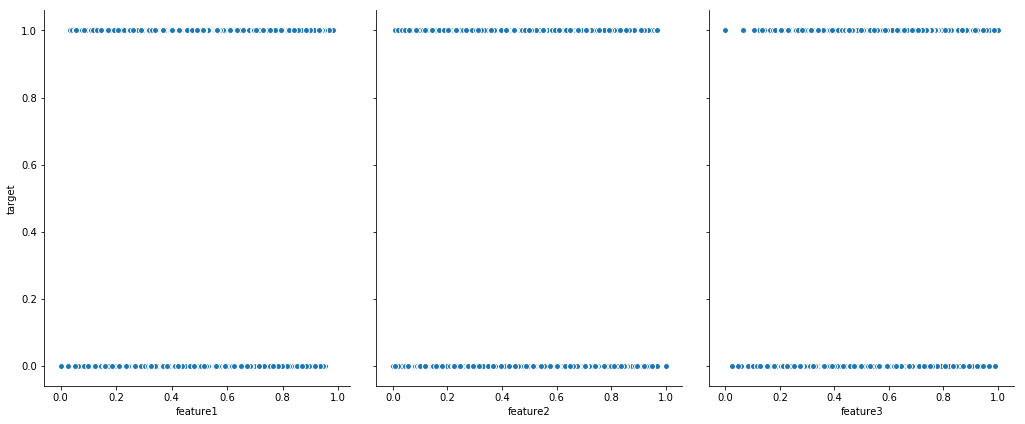

In [3]:
#visualization
%matplotlib inline
import seaborn as sns

sns.pairplot(data,x_vars=['feature1','feature2','feature3'], y_vars='target', size=6, aspect=0.8)

In [ ]:
sns.pairplot(data)

In [4]:
autocorrelations = data.corr()
autocorrelations

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,target
feature1,1.000000,0.052235,0.268592,0.575266,-0.232569,0.050239,0.236731,0.353736,-0.026828,0.304151,...,0.014418,-0.328981,0.321252,-0.166846,-0.064165,-0.058410,-0.103445,0.461755,0.463997,-0.023739
feature2,0.052235,1.000000,0.060798,0.167933,0.090582,0.065188,0.078051,-0.198353,-0.344488,-0.390495,...,-0.182877,-0.122144,0.394702,-0.427293,0.299501,-0.386592,0.284676,-0.001915,-0.236733,0.004493
feature3,0.268592,0.060798,1.000000,0.339729,-0.451344,-0.108867,0.289721,0.103621,-0.291853,0.211713,...,0.228395,-0.448029,0.139679,0.061803,0.082532,-0.007649,0.082287,0.336003,0.168473,-0.020993
feature4,0.575266,0.167933,0.339729,1.000000,-0.367229,-0.022561,0.248877,0.498825,-0.482243,0.140749,...,0.356322,-0.499655,0.542740,-0.071326,0.011632,-0.397542,0.047488,0.650631,0.529017,-0.030265
feature5,-0.232569,0.090582,-0.451344,-0.367229,1.000000,0.124150,-0.394833,0.025686,0.278853,-0.193980,...,-0.080955,0.346817,0.139804,-0.077751,-0.278968,0.253400,0.001288,-0.387678,-0.381959,0.022572
feature6,0.050239,0.065188,-0.108867,-0.022561,0.124150,1.000000,-0.303600,0.054266,0.076245,-0.117375,...,-0.098421,0.078135,0.037780,-0.350825,-0.019202,0.083195,0.161204,-0.208296,0.163689,0.005825
feature7,0.236731,0.078051,0.289721,0.248877,-0.394833,-0.303600,1.000000,0.011678,0.033536,0.092471,...,-0.011352,-0.617799,-0.208491,0.246365,-0.124816,0.086254,-0.147270,0.127993,0.059359,-0.002354
feature8,0.353736,-0.198353,0.103621,0.498825,0.025686,0.054266,0.011678,1.000000,-0.028858,0.129246,...,0.566943,-0.176090,0.584745,0.176027,-0.215167,0.004106,-0.259911,0.581611,0.397373,-0.016069
feature9,-0.026828,-0.344488,-0.291853,-0.482243,0.278853,0.076245,0.033536,-0.028858,1.000000,0.231770,...,-0.120403,0.203783,-0.186404,0.044705,-0.382071,0.740922,-0.466980,-0.307143,-0.203601,0.020541
feature10,0.304151,-0.390495,0.211713,0.140749,-0.193980,-0.117375,0.092471,0.129246,0.231770,1.000000,...,0.208205,-0.274409,-0.088520,0.349718,-0.133064,0.349586,-0.212938,0.230808,0.532791,-0.016210


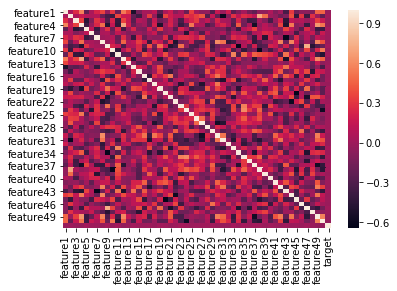

In [6]:
sns.heatmap(autocorrelations)

In [ ]:
data.tail()